In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kitcolors as kit 
from shapely.geometry import LineString
from shapely.geometry import Point
import scipy.integrate as integrate
from numba import jit

In [10]:
def computeintersectiondistance(y,alpha,r):
    L = 100
    p = Point(0,0)
    c = p.buffer(r).boundary
    l = LineString([(1-L*np.cos(alpha),y-L*np.sin(alpha)), (1, y)])
    i = c.intersection(l)
    try:
        p1 = i.geoms[0].coords[0]
        p2 = i.geoms[1].coords[0]
        d1 = np.sqrt((p1[0]-1)**2+(p1[1]-y)**2)
        d2 = np.sqrt((p2[0]-1)**2+(p2[1]-y)**2)
        if d1>d2:
            t = d1
            d1 = d2
            d2 = t
        return d1, d2
    except:
        return 0,0
    
    
def computeflux(y,alpha,r,sigma):
    d1,d2 = computeintersectiondistance(y,alpha,r)
    #res = integrate.quad(lambda x: np.exp(-x*sigma),d1,d2)
    res = (np.exp(-d1*sigma)-np.exp(-d2*sigma))/sigma
    return res
def drawsketch(y=1.2,r=0.5,alpha=np.pi/4):
    plt.style.use("kitish")
    fig, ax = plt.subplots(1,1,figsize=(2,2))
    circle = plt.Circle((0, 0), r, color=kit.green)
    ax.add_artist(circle)
    ax.axvline(1,color =kit.blue)
    l = 0.2
    _,L = computeintersectiondistance(y,alpha,r)
    ax.arrow(1,y,l*np.cos(alpha),l*np.sin(alpha),head_width=0.1,facecolor="k")
    ax.plot([1,1-L*np.cos(alpha)],[y,y-L*np.sin(alpha)],"--",color="k",lw = 1)
    ax.text(1+0.1,y-0.1,r"$\alpha$")
    ax.set_xlim([-2*r,1+r+l])
    ax.set_ylim([-2*r,2])
    ax.set_aspect('equal', 'box')
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.text(r-0.2,0,r"$r$")
    ax.scatter(0,0,c="k",s=10,zorder=100)
    ax.scatter(1,y,c="k",s=10,zorder=100)
    ax.text(1-0.1,y,r"$(1,y)$",horizontalalignment="right")
    #ax.plot([1,1+0.4],[y,y],"k",'--')
    plt.savefig("Setup.pdf")
def computefluxes(n,m,r=0.5,sigma=1):
    ALPHA = np.linspace(-np.pi/2,np.pi/2,n)
    Y = np.linspace(-1,1,m)
    F = np.zeros((n,m))
    for i,ai in enumerate(ALPHA):
        for j,yj in enumerate(Y):
            f = computeflux(yj,ai,r,sigma)
            F[i,j] = f
    return F
def plotresults(n,m,F,referencephi):
    plt.style.use("kitish")
    ALPHA = np.linspace(-np.pi/2,np.pi/2,n)
    Y = np.linspace(-1,1,m)
    fig,axs = plt.subplots(1,2)
    ax = axs[0]
    cs = ax.pcolormesh(F.T,cmap = "inferno",linewidth=0,rasterized=True)
    ax.set_ylabel(r"$y$")
    ax.set_xlabel(r"$\alpha$")
    ax.set_xticks([0,n/2,n])
    ax.set_xticklabels([r"$-\pi/2$",r"$0$", r"$\pi/2$"])
    ax.set_yticklabels([r"$-1$",r"$0$", r"$1$"])
    ax.set_yticks([0,m/2,m])
    clb = fig.colorbar(cs,orientation="vertical",ax=ax)
    clb.ax.set_title(r"$\psi(y,\alpha)$",pad = 5)

    ax = axs[1]
    ax.set_xlabel(r"$\phi(y)$")

    phi = np.zeros(m)
    for i in range(m):
        phi[i] = np.sum(F[:,i])/n
    ax.plot(phi,Y,"k",lw = 1)
    #ax.set_xticklabels([r"$-\pi/2$",r"$0$", r"$\pi/2$"])
    ax.set_ylabel(r"$y$")
    ax.set_yticks([-1,0,1])
    ax.set_ylim([-1,1])
    #ax.set_xlim([0,0.002])
    ax.set_xlim([0.9*np.min(phi),1.1*np.max(phi)])
    ax.set_yticklabels([r"$-1$",r"$0$", r"$1$"])
    plt.savefig("figure{}_{}.pdf".format(n,m))
    
    return phi,referencephi
def integrand(rad,theta,y,sigma):
    xx,yy = np.cos(theta)*rad, np.sin(theta)*rad
    d2 = (xx-1)**2+(yy-y)**2
    d = d2**0.5
    return np.exp(-sigma*d)*rad

def computeexactscalarflux(y,m,r,sigma):
    Y = np.linspace(-1,1,m)
    Phi = np.zeros(m)
    for i,yi in enumerate(Y):
        
        def integr(rad,theta):
            return integrand(rad,theta,yi,sigma)

        result = integrate.dblquad(integr,-np.pi,np.pi,0,r)
        Phi[i] = result[0]
    return Phi


def computeexactscalarfluxV2(y,m,r,sigma):
    Y = np.linspace(-1,1,m)
    Phi = np.zeros(m)
    for i,yi in enumerate(Y):
        def integrand(alpha):
            return computeflux(yi,alpha,r,sigma)


        result = integrate.quad(integrand,-np.pi,np.pi)
        Phi[i] = result[0]
    return Phi


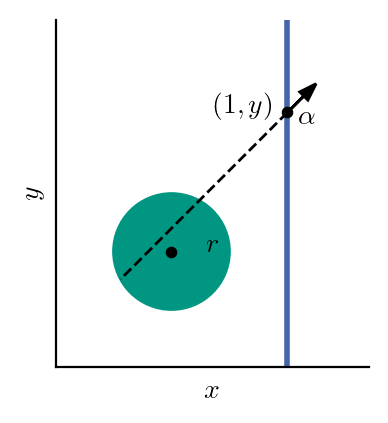

In [11]:
drawsketch(r=0.5)

In [15]:
n,m,r,sigma = 10,100,0.5,1
referencephi =computeexactscalarflux(1.0,m,r,sigma)

In [16]:
F=computefluxes(n,m,r,sigma)

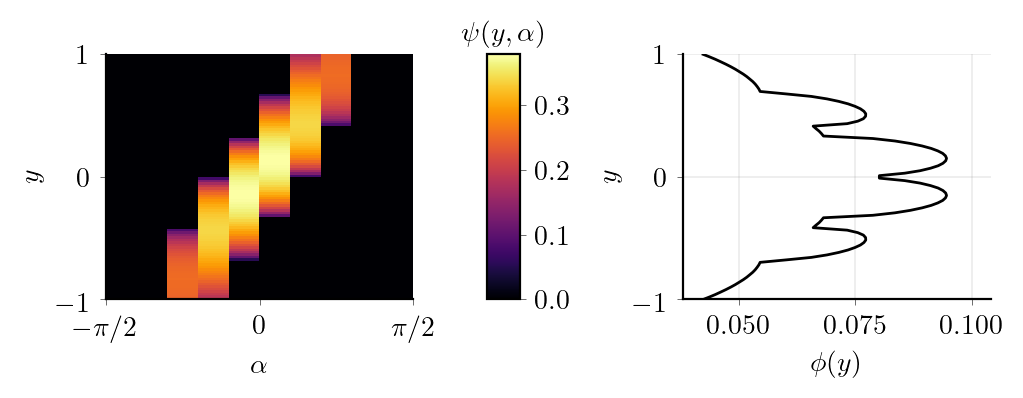

In [17]:
phi,refphi = plotresults(n,m,F,referencephi)

In [69]:
refphi2 = computeexactscalarfluxV2(1,len(refphi),0.5,1.0)

/home/qd4314/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:119: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


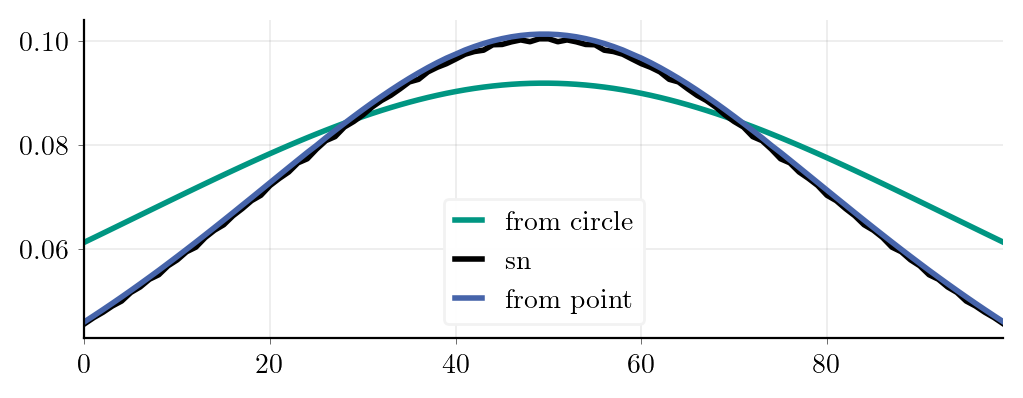

In [85]:

fig,ax = plt.subplots()
ax.plot(referencephi/np.pi)
ax.plot(phi)
ax.plot(refphi2/np.pi)
ax.legend(["from circle","sn","from point"])